In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import boston_housing

(x_train_set, y_train_set), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

x_train = scal.fit_transform(x_train)
x_valid = scal.transform(x_valid)
x_test = scal.transform(x_test)

In [6]:
#Build Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [7]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [9]:
weights, biases = model.layers[1].get_weights()

In [10]:
biases.shape,biases

((50,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [11]:
weights.shape,weights

((100, 50),
 array([[-0.19203119,  0.02427587, -0.1509232 , ..., -0.06033793,
         -0.05577564,  0.12381087],
        [-0.09644122,  0.00063482,  0.16225992, ...,  0.05465813,
          0.09438671,  0.13005333],
        [ 0.15203242, -0.16479054,  0.12914415, ..., -0.04216857,
          0.06057568, -0.1973515 ],
        ...,
        [-0.19456263,  0.03786702,  0.01290742, ...,  0.18546273,
         -0.01734504,  0.10431542],
        [-0.16025023, -0.08383689,  0.13890295, ..., -0.0348649 ,
         -0.0386066 , -0.05496874],
        [-0.01067582,  0.11649738, -0.15537095, ..., -0.15597606,
         -0.09923587,  0.08725439]], dtype=float32))

In [12]:
#compile

model.compile(loss='mse', optimizer=SGD(learning_rate=1e-3))

In [13]:
train=model.fit(x_train,y_train, epochs=20, validation_data=(x_valid,y_valid))

Epoch 1/20
10/10 [==============================] - 1s 21ms/step - loss: 504.9669 - val_loss: 344.7118
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 177.8345 - val_loss: 63.6017
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 42.3829 - val_loss: 34.9969
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 27.6433 - val_loss: 27.2797
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 22.4569 - val_loss: 23.6108
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 19.8627 - val_loss: 21.8598
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 18.1589 - val_loss: 19.7388
Epoch 8/20
10/10 [==============================] - 0s 6ms/step - loss: 16.8801 - val_loss: 18.9204
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 15.6924 - val_loss: 17.8159
Epoch 10/20
10/10 [==============================] - 0s 6ms/step - loss: 14.5365 - val_loss: 16.

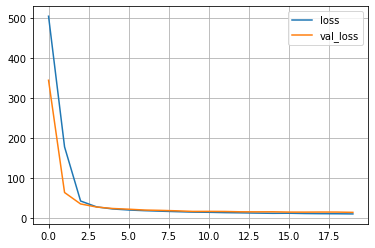

In [14]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [15]:
#Evaluate
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.8355


24.835527420043945

In [16]:
#predict
model.predict(x_test[:3])

1/1 [==============================] - 0s 176ms/step


array([[ 7.8614826],
       [16.635248 ],
       [20.525663 ]], dtype=float32)

In [17]:
y_test[:3]

array([ 7.2, 18.8, 19. ])